Name: Kanchika Sudhirkumar Kapoor

email: 10621287@mydbs.ie

## **Question 3**                                                                                  

 Use dataset available on http://users.stat.ufl.edu/~winner/data/nfl2008_fga.csv

⦁	Use LDA to classify the dataset into few classes so that at least 90% of information of dataset is explained through new classification. (Hint: model the variable `qtr` to variables `togo`, `kicker`, and `ydline`). How many LDs do you choose? Explain the reason.                                                                                           
⦁	Apply PCA, and identify the important principle components involving at least 90% of dataset variation. Explain your decision strategy?  Plot principle components versus their variance.                                    



In [2]:
!wget http://users.stat.ufl.edu/~winner/data/nfl2008_fga.csv --no-check-certificate

--2022-12-24 22:17:36--  http://users.stat.ufl.edu/~winner/data/nfl2008_fga.csv
Resolving users.stat.ufl.edu (users.stat.ufl.edu)... 128.227.24.94
Connecting to users.stat.ufl.edu (users.stat.ufl.edu)|128.227.24.94|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://users.stat.ufl.edu/~winner/data/nfl2008_fga.csv [following]
--2022-12-24 22:17:36--  https://users.stat.ufl.edu/~winner/data/nfl2008_fga.csv
Connecting to users.stat.ufl.edu (users.stat.ufl.edu)|128.227.24.94|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 83329 (81K) [text/csv]
Saving to: ‘nfl2008_fga.csv’

nfl2008_fga.csv     100%[===================>]  81.38K  --.-KB/s    in 0.03s   

2022-12-24 22:17:36 (2.71 MB/s) - ‘nfl2008_fga.csv’ saved [83329/83329]



In [30]:
# import all modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [3]:
# create dataframe
df = pd.read_csv('nfl2008_fga.csv')
# check if any columns has null values
df.isnull().sum()

GameDate    0
AwayTeam    0
HomeTeam    0
qtr         0
min         0
sec         0
kickteam    0
def         0
down        2
togo        2
kicker      0
ydline      0
name        0
distance    0
homekick    0
kickdiff    0
timerem     0
offscore    0
defscore    0
season      0
GOOD        0
Missed      0
Blocked     0
dtype: int64

`togo` and `down` columns has some null values. we can check the datatype for those columns and decide on droping those rows or replacing with 0

In [28]:
df.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,...,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
0,20081130,IND,CLE,1,47,2,IND,CLE,4.0,11.0,...,30,0,-3,2822,0,3,2008,1,0,0
1,20081005,IND,HOU,1,54,47,IND,HOU,4.0,3.0,...,46,0,0,3287,0,0,2008,1,0,0
2,20081228,TEN,IND,1,45,20,IND,TEN,4.0,3.0,...,28,1,7,2720,7,0,2008,1,0,0
3,20081012,BAL,IND,1,45,42,IND,BAL,4.0,1.0,...,37,1,14,2742,14,0,2008,1,0,0
4,20080907,CHI,IND,1,50,56,IND,CHI,4.0,21.0,...,39,1,0,3056,0,0,2008,1,0,0


both `togo` and `down` columns are numerical. we can replace null values with 0

In [5]:
df = df.fillna(0)
df.isnull().sum()

GameDate    0
AwayTeam    0
HomeTeam    0
qtr         0
min         0
sec         0
kickteam    0
def         0
down        0
togo        0
kicker      0
ydline      0
name        0
distance    0
homekick    0
kickdiff    0
timerem     0
offscore    0
defscore    0
season      0
GOOD        0
Missed      0
Blocked     0
dtype: int64

### Q3.a.Answer

In [6]:
# print(df.columns)

x = df[['ydline', 'kicker', 'togo']]
y = df['qtr']

In [7]:
y.unique()

array([1, 2, 3, 4, 5])

In [14]:
#Initializing LDA
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(x, y)

In [26]:
lda_df=pd.DataFrame(X_lda)
lda_df.head()

,0,1,2
0,-0.167924,1.187875,0.872962
1,0.750595,-0.670894,-1.180925
2,-0.692173,0.427792,-0.848015
3,-0.061775,-0.342091,-1.453962
4,1.008387,1.741230,2.903967


In [16]:
# Checking Variance Ratio
lda_var_ratios = lda_model.explained_variance_ratio_
lda_var_ratios

array([0.69027229, 0.24866688, 0.06106083])

In [27]:
lda_df = lda_df.drop(2,axis=1)
lda_df.head()

,0,1
0,-0.167924,1.187875
1,0.750595,-0.670894
2,-0.692173,0.427792
3,-0.061775,-0.342091
4,1.008387,1.741230


2 LDs are chosen since, the variance ratio of 3rd LD is comparatively very low. 

The total variance of LD1 and LD2 amounts to approx. 0.94

### Q3.b.Answer

In [53]:
# create the PCA instance and fit transform on independent features
pca_model = PCA()
x = df[["togo","ydline","kicker","distance","homekick","kickdiff","timerem"]]
X_pca = pca_model.fit_transform(x)

In [54]:
pda_df = pd.DataFrame(X_pca)
pda_df.head()

,0,1,2,3,4,5,6
0,-1117.364095,-8.216416,4.203932,2.876802,4.992394,0.259045,-0.434343
1,-1582.346693,13.936185,3.536549,-0.824618,-4.786317,-0.555416,-0.550318
2,-1015.357652,-11.624594,5.174718,-7.567141,-2.024739,0.021399,0.434529
3,-1037.342888,1.015018,5.291474,-14.534817,-4.709722,-0.307126,0.332654
4,-1351.351648,5.590615,3.881281,0.509047,13.961923,0.450106,0.561355


In [55]:
#variance explained by each component
pca_variance_ratio = pca_model.explained_variance_ratio_
print(pca_variance_ratio)

[9.99565220e-01 1.99285235e-04 1.26761728e-04 9.21077241e-05
 1.52729172e-05 1.11517256e-06 2.37704095e-07]


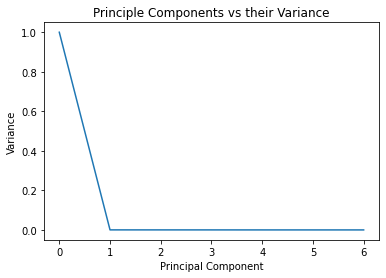

In [60]:
pca_vals = np.arange(pca_model.n_components_)
plt.plot(pca_vals, pca_variance_ratio)
plt.title('Principle Components vs their Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.show()

From the above, we can choose the 1st PCA component since it alone covers over 99% of the variance in data provided